<a href="https://colab.research.google.com/github/reneerex/Spotify-Artist-Data-Analysis/blob/main/Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎵 Spotify Artist Dataset Analysis**

This notebook explores artist metadata from Spotify, including followers, popularity, and genre information. The goal is to analyze key trends across artists and visualize insights related to their reach and genre distribution.
<br><br>
📁 **Dataset Source**: <br>
The data used in this analysis comes from Kaggle:  
[Spotify Dataset on Kaggle](https://www.kaggle.com/datasets/nimishasen27/spotify-dataset?select=artists.csv)<br><br>

We'll focus specifically on the `artists.csv` file, which includes the following fields:
- `id`: Unique identifier for each artist
- `name`: Artist's name
- `followers`: Number of Spotify followers
- `genres`: List of genres associated with the artist
- `popularity`: A score from 0 to 100 indicating the artist's popularity



In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('artists.csv')

In [ ]:
#first 5 rows
df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [6]:
#shape
df.shape

(122574, 5)

In [7]:
#columns
df.columns

Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')

In [8]:
#summary
df.describe()

,followers,popularity
count,1.225730e+05,122573.000000
mean,2.211345e+04,17.653659
std,2.152692e+05,19.818985
min,0.000000e+00,0.000000
25%,1.000000e+00,0.000000
50%,2.900000e+01,8.000000
75%,4.058000e+03,35.000000
max,3.241931e+07,98.000000


In [9]:
#duplicates, null values removal
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
df.dropna(subset=['id', 'name'], inplace=True)

id            0
followers     1
genres        1
name          1
popularity    1
dtype: int64


In [32]:
#top 5 followed artists
top_followed = df.sort_values(by='followers', ascending=False).head(5)
top_followed.reset_index(drop=True, inplace=True)
top_followed.index = top_followed.index + 1
top_followed[['name', 'followers']]

,name,followers
1,Shawn Mendes,32419313.0
2,Bad Bunny,32244734.0
3,Marília Mendonça,19554042.0
4,Juice WRLD,16996777.0
5,KAROL G,15941533.0


In [11]:
#top 5 popular artists
top_popular = df.sort_values(by='popularity', ascending=False).head()
top_popular.reset_index(drop=True, inplace=True)
top_popular.index = top_popular.index + 1
top_popular[['name', 'popularity']]

,name,popularity
1,Bad Bunny,98.0
2,Juice WRLD,96.0
3,Myke Towers,95.0
4,DaBaby,93.0
5,Pop Smoke,92.0


In [12]:
import ast

In [28]:
#genre column strings --> list
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
print(type(df['genres'].iloc[0]))

<class 'list'>


In [15]:
from collections import Counter

In [31]:
#df['genres'] = [['pop', 'dance pop'],[]]  --> ['pop', 'dance pop']
all_genres = sum(df['genres'], [])

In [20]:
#top 5 genres
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(5)
top_genres

[('latin rock', 224),
 ('electro house', 214),
 ('c-pop', 210),
 ('mandopop', 206),
 ('j-pop', 203)]

In [22]:
#['pop', 'rock'] becomes two rows — one for pop, one for rock
#top 5 popular genres
df_exploded = df.explode('genres')
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False).head()
genre_popularity

,popularity
genres,
trap metal italiana,74.000000
queer country,72.000000
tennessee hip hop,71.000000
new york drill,68.333333
melodic rap,67.814815


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

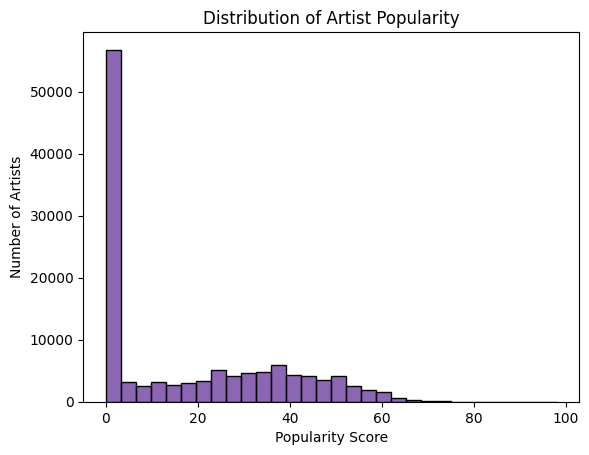

In [48]:
#popularity distribution plot
sns.histplot(df['popularity'], bins=30, color='rebeccapurple')
plt.title("Distribution of Artist Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Artists")
plt.show()

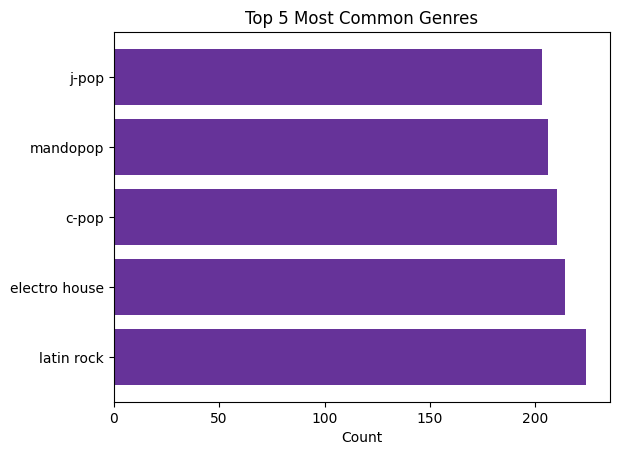

In [43]:
#top 5 genres bar plot
genres, counts = zip(*top_genres)
plt.barh(genres, counts, color='rebeccapurple')
plt.title("Top 5 Most Common Genres")
plt.xlabel("Count")
plt.show()

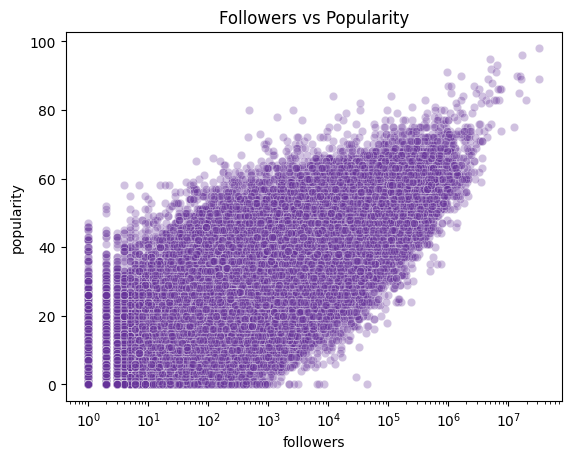

In [44]:
#followers vs popularity
sns.scatterplot(data=df, x='followers', y='popularity', alpha=0.3, color='rebeccapurple')
plt.xscale('log')
plt.title("Followers vs Popularity")
plt.show()